<a href="https://colab.research.google.com/github/musiur/preprocess_salary_dataset/blob/main/data-cleaning-salary-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import pandas as pd

# Try setting error_bad_lines=False to skip bad lines
df = pd.read_csv('job_descriptions.csv', engine="python", on_bad_lines='warn')

# Print the column names to check if 'description' exists and if not what the correct name is

df = df.drop(columns=['latitude', 'longitude', 'Contact', 'Contact Person'])

# Extracting lower and upper bounds from the 'Salary Range' column
df[['Lower Salary', 'Upper Salary']] = df['Salary Range'].str.extract(r'\$(\d+)(?:K)?-\s*\$(\d+)(?:K)?')

# Convert extracted values to numeric and multiply by 1000 if they are in thousands
df['Lower Salary'] = pd.to_numeric(df['Lower Salary']) * 1000
df['Upper Salary'] = pd.to_numeric(df['Upper Salary']) * 1000

# Dropping the original 'Salary Range' column if no longer needed
df = df.drop(columns=['Salary Range'])

df[['Lower Experience', 'Upper Experience']] = df['Experience'].str.extract(r'(\d+)\s*to\s*(\d+)\s*Years')

# Convert extracted values to numeric
df['Lower Experience'] = pd.to_numeric(df['Lower Experience'])
df['Upper Experience'] = pd.to_numeric(df['Upper Experience'])

# Dropping the original 'Experience' column if no longer needed
df = df.drop(columns=['Experience'])
print(df.columns)

# Assuming the column is named 'job_description' based on the provided global variables
# salary_range_count = df['job_description'].str.contains(r'\$\d+,\d+ - \$\d+,\d+|\$\d+ - \$\d+').sum()

# print(f"Number of tuples with salary range: {salary_range_count}")


Index(['Job Id', 'Qualifications', 'location', 'Country', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile', 'Lower Salary',
       'Upper Salary', 'Lower Experience', 'Upper Experience'],
      dtype='object')


In [242]:
df.shape

(1615940, 21)

In [243]:
print(df.describe())

             Job Id  Company Size  Lower Salary  Upper Salary  \
count  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06   
mean   1.548935e+15  7.370467e+04  6.000343e+04  1.049789e+05   
std    8.946722e+14  3.529886e+04  3.163964e+03  1.471749e+04   
min    1.817948e+11  1.264600e+04  5.500000e+04  8.000000e+04   
25%    7.740508e+14  4.311400e+04  5.700000e+04  9.200000e+04   
50%    1.547858e+15  7.363300e+04  6.000000e+04  1.050000e+05   
75%    2.323729e+15  1.043000e+05  6.300000e+04  1.180000e+05   
max    3.099618e+15  1.348340e+05  6.500000e+04  1.300000e+05   

       Lower Experience  Upper Experience  
count      1.615940e+06      1.615940e+06  
mean       2.501808e+00      1.149798e+01  
std        1.707809e+00      2.291933e+00  
min        0.000000e+00      8.000000e+00  
25%        1.000000e+00      9.000000e+00  
50%        3.000000e+00      1.100000e+01  
75%        4.000000e+00      1.300000e+01  
max        5.000000e+00      1.500000e+01  


In [244]:
print(len(df))

1615940


In [245]:
df.tail()


,Job Id,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Lower Salary,Upper Salary,Lower Experience,Upper Experience
1615935,134563577088850,B.Tech,"Malabo (de jure),",Equatorial Guinea,Full-Time,18281,2022-05-19,Both,Mechanical Engineer,Mechanical Design Engineer,...,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I...",64000,114000,0,12
1615936,618604818190827,M.Tech,Warsaw,Poland,Intern,63621,2023-03-14,Male,IT Manager,IT Director,...,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":...",62000,130000,2,14
1615937,615471367712200,BCA,Ashgabat,Turkmenistan,Part-Time,114287,2022-01-23,Female,Mechanical Engineer,Mechanical Design Engineer,...,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct...",60000,96000,4,15
1615938,804137342023945,BCA,Ouagadougou,Burkina Faso,Full-Time,45009,2021-12-28,Female,HR Coordinator,Training Coordinator,...,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""...",65000,103000,5,15
1615939,404645755314484,BBA,Asmara,Eritrea,Part-Time,87637,2022-10-01,Male,Event Planner,Wedding Planner,...,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip...",56000,109000,1,11


In [246]:
df.shape

(1615940, 21)

Data Clening


In [247]:
df.isnull()

,Job Id,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Lower Salary,Upper Salary,Lower Experience,Upper Experience
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [248]:
df.isnull().sum()

Job Id                 0
Qualifications         0
location               0
Country                0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
Lower Salary           0
Upper Salary           0
Lower Experience       0
Upper Experience       0
dtype: int64

In [249]:
df.isnull().sum().sum()

np.int64(5478)

In [250]:
df.shape

(1615940, 21)

In [251]:
df=df.dropna()

In [252]:
df.shape

(1610462, 21)

In [253]:
df.isnull().sum()

Job Id              0
Qualifications      0
location            0
Country             0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
Lower Salary        0
Upper Salary        0
Lower Experience    0
Upper Experience    0
dtype: int64

duplicates

In [254]:
df[df.duplicated()]

,Job Id,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Lower Salary,Upper Salary,Lower Experience,Upper Experience


In [255]:
df.columns

Index(['Job Id', 'Qualifications', 'location', 'Country', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile', 'Lower Salary',
       'Upper Salary', 'Lower Experience', 'Upper Experience'],
      dtype='object')

Outliers


<Axes: ylabel='Lower Experience'>

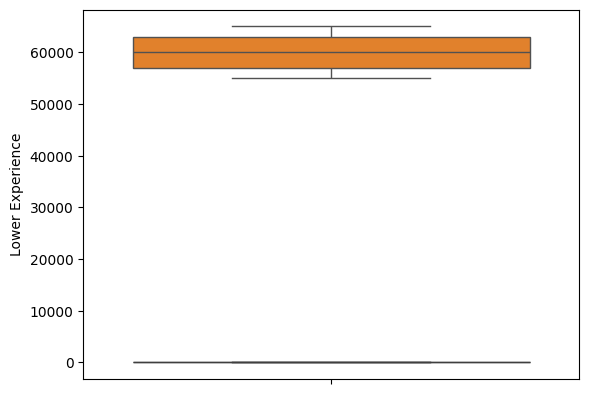

In [256]:
import seaborn as sns
sns.boxplot(y=df['Lower Experience'], legend='auto')
sns.boxplot(y=df['Lower Salary'], legend='auto')

In [257]:
df.columns

Index(['Job Id', 'Qualifications', 'location', 'Country', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile', 'Lower Salary',
       'Upper Salary', 'Lower Experience', 'Upper Experience'],
      dtype='object')

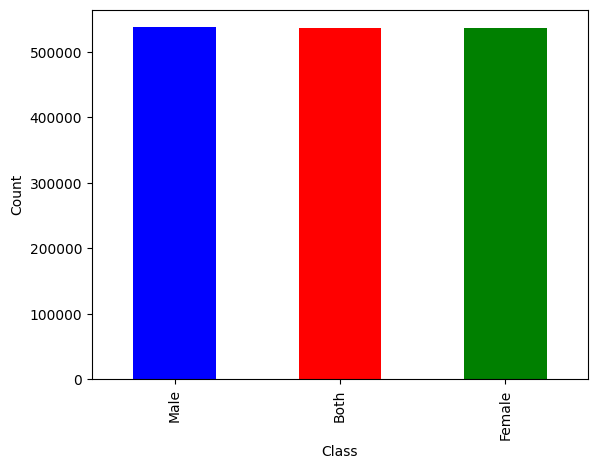

In [258]:
import matplotlib.pyplot as plt

df['Preference'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
# plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

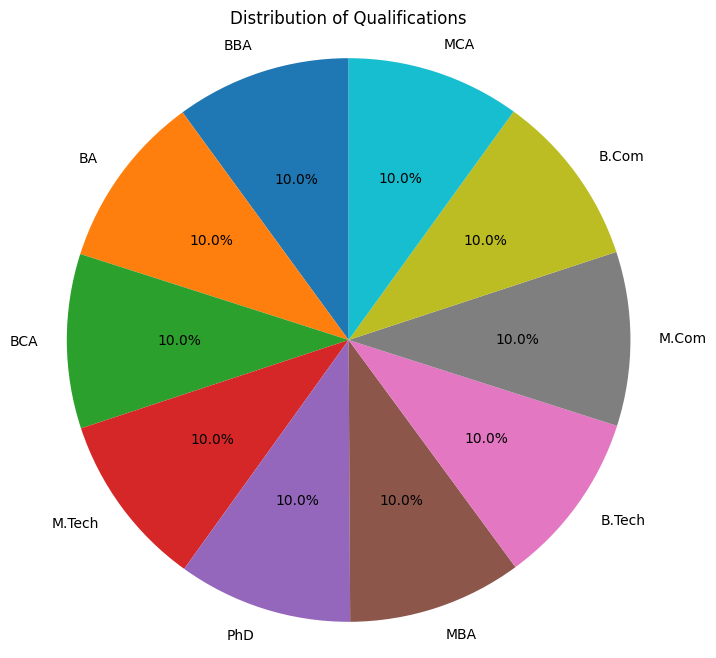

In [259]:


import matplotlib.pyplot as plt

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(qualification_counts, labels=qualification_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Qualifications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [260]:
# Count how many job roles and job title are there

job_role_count = df['Role'].nunique()
job_title_count = df['Job Title'].nunique()
job_company_count = df['Company'].nunique()

print(f"Number of unique roles: {job_role_count}")
print(f"Number of unique job titles: {job_title_count}")
print(f"Number of unique companies: {job_title_count}")


Number of unique roles: 376
Number of unique job titles: 147
Number of unique companies: 147


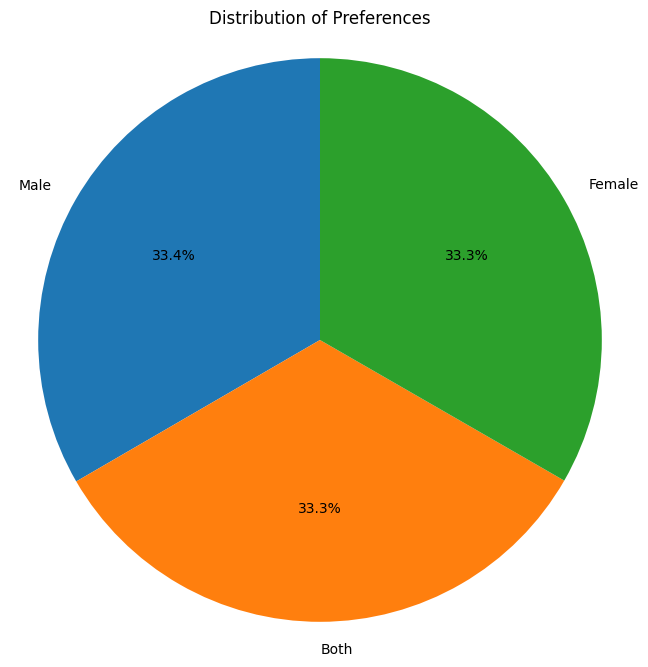

In [261]:
# Making pie chart using pyplot for Preference

preference_counts = df['Preference'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Preferences')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


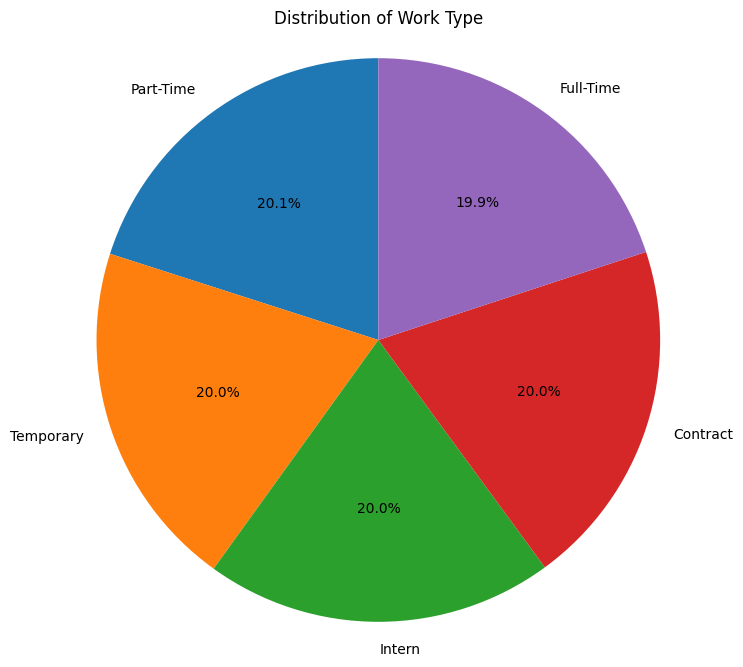

In [262]:
# Making a pie chart using pylplot of Work Type

import matplotlib.pyplot as plt

work_type_counts = df['Work Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Work Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [263]:
df.columns

Index(['Job Id', 'Qualifications', 'location', 'Country', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile', 'Lower Salary',
       'Upper Salary', 'Lower Experience', 'Upper Experience'],
      dtype='object')

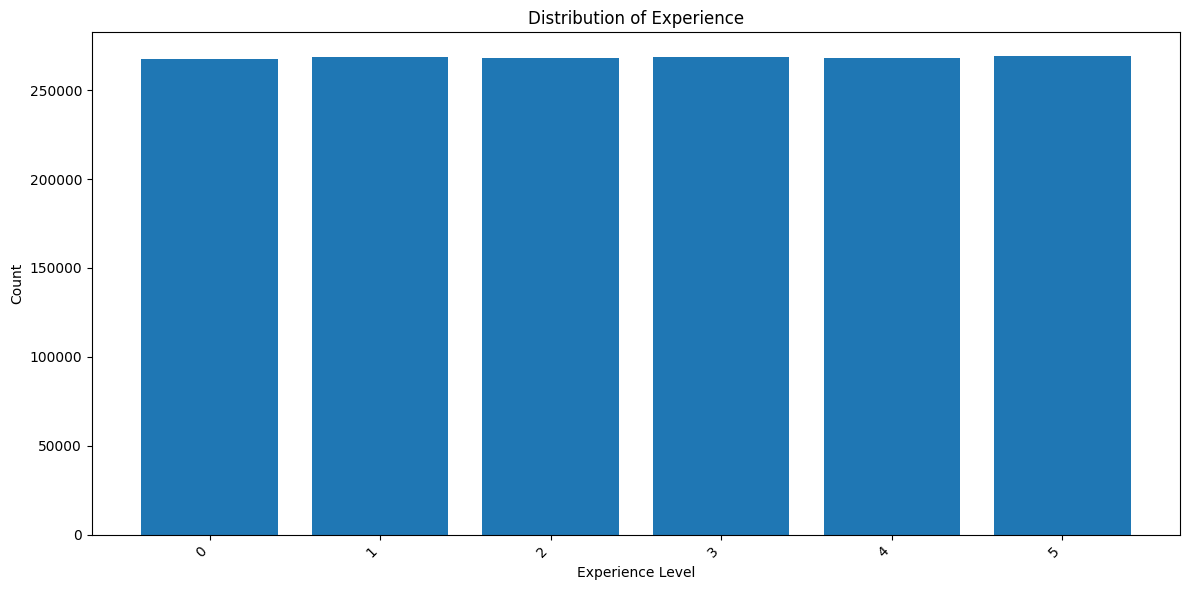

In [264]:
# Using Pyplot make barchart from left to right I mean the y axis will be x axis for Experience. Making gap 10px between bar more so that levels are not overlape

import matplotlib.pyplot as plt

# Assuming 'Experience' is a column in your DataFrame 'df'
experience_counts = df['Lower Experience'].value_counts().sort_index()

# Create a bar chart with custom width and spacing
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.8
bar_spacing = 10  # Adjust the spacing between bars as needed

plt.bar(experience_counts.index, experience_counts.values, width=bar_width)

# Customize the chart
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience')

# Set x-axis ticks and labels
plt.xticks(experience_counts.index, rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()


plt.show()


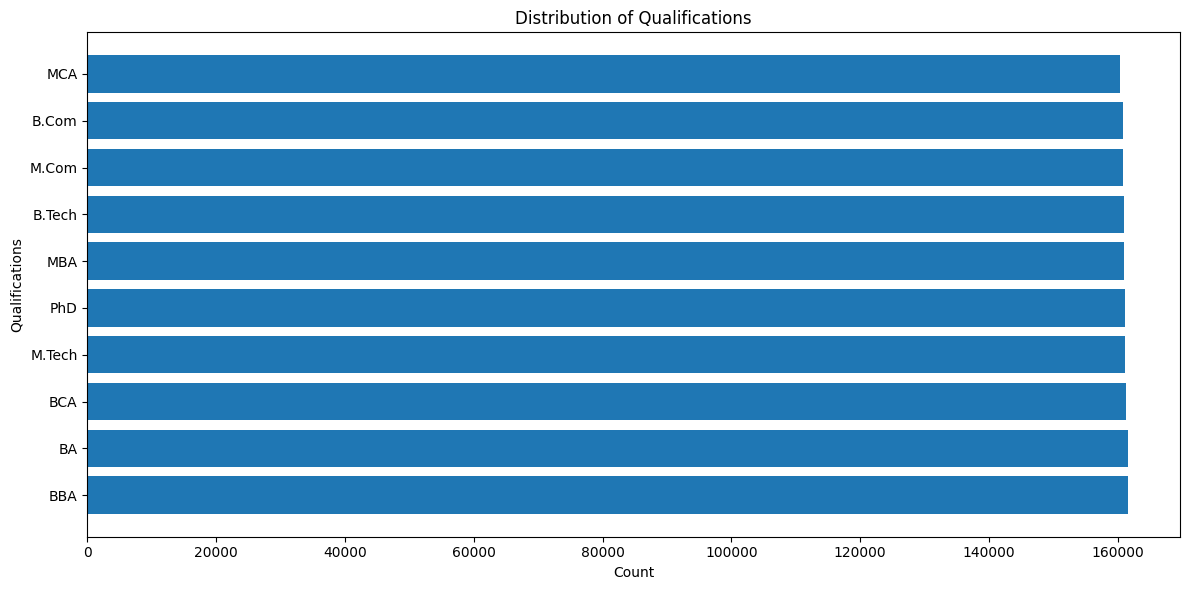

In [265]:
# Using Pyplot make barchart from left to right I mean the y axis will be x axis for Qualifications. Making gap 10px between bar more so that levels are not overlape

import matplotlib.pyplot as plt

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

# Create a horizontal bar chart with custom width and spacing
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.8
bar_spacing = 10  # Adjust the spacing between bars as needed

# Create the bar chart with horizontal orientation
plt.barh(qualification_counts.index, qualification_counts.values, height=bar_width)

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Qualifications')
plt.title('Distribution of Qualifications')

# Set x-axis ticks and labels
#plt.xticks(qualification_counts.index, rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()

plt.show()


In [266]:
# Count each qualifications

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

print(qualification_counts)


Qualifications
BBA       161574
BA        161566
BCA       161215
M.Tech    161186
PhD       161109
MBA       160967
B.Tech    160886
M.Com     160833
B.Com     160774
MCA       160352
Name: count, dtype: int64


In [267]:
# Do level Encoding for each level in dataset and show in a table

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
  # Check if the column's data type is object (categorical)
  if df[column].dtype == 'object':
    # Fit and transform the column using LabelEncoder
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded values
print(df)


                   Job Id  Qualifications  location  Country  Work Type  \
0        1089843540111562               6        59       92          2   
1         398454096642776               4        11      198          2   
2         481640072963533               9       102      114          4   
3         688192671473044               9       152       20          1   
4         117057806156508               7       172       39          2   
...                   ...             ...       ...      ...        ...   
1615935   134563577088850               1       105       58          1   
1615936   618604818190827               6       204      154          2   
1615937   615471367712200               4        11      198          3   
1615938   804137342023945               4       139       30          1   
1615939   404645755314484               3        12       59          3   

         Company Size  Job Posting Date  Preference  Job Title  Role  ...  \
0               26801 

In [268]:
df.shape

(1610462, 21)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610462 entries, 0 to 1615939
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   Job Id            1610462 non-null  int64
 1   Qualifications    1610462 non-null  int64
 2   location          1610462 non-null  int64
 3   Country           1610462 non-null  int64
 4   Work Type         1610462 non-null  int64
 5   Company Size      1610462 non-null  int64
 6   Job Posting Date  1610462 non-null  int64
 7   Preference        1610462 non-null  int64
 8   Job Title         1610462 non-null  int64
 9   Role              1610462 non-null  int64
 10  Job Portal        1610462 non-null  int64
 11  Job Description   1610462 non-null  int64
 12  Benefits          1610462 non-null  int64
 13  skills            1610462 non-null  int64
 14  Responsibilities  1610462 non-null  int64
 15  Company           1610462 non-null  int64
 16  Company Profile   1610462 non-null  int64

** Feature Engineering**

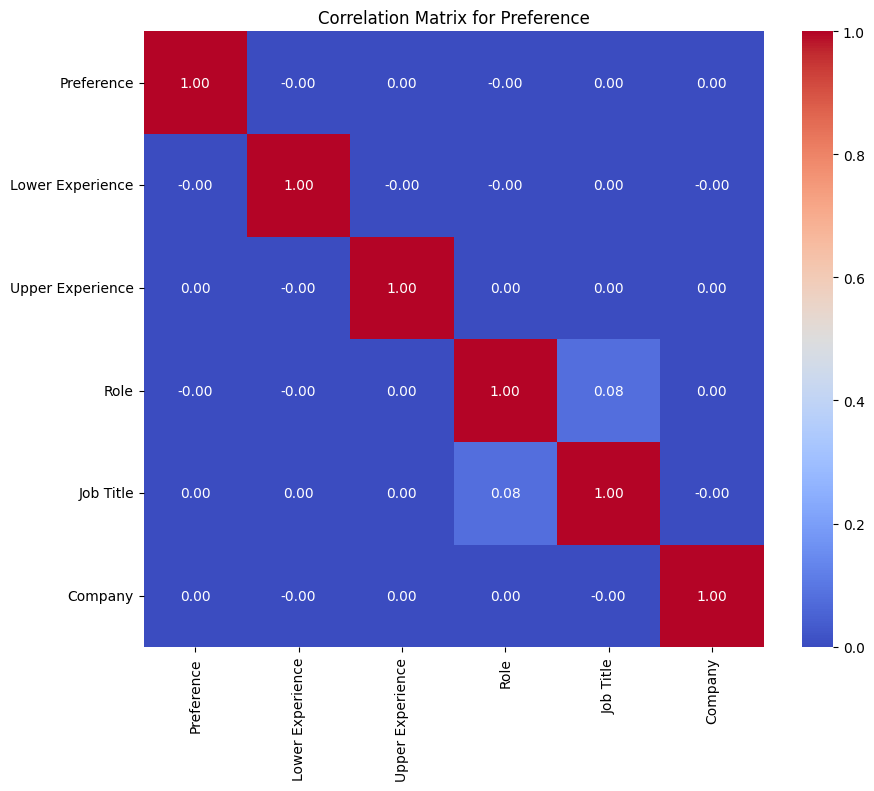

In [271]:
# Co relation for Preference and make heatmap using pyplot

correlation_matrix = df[['Preference', 'Lower Experience', 'Upper Experience', 'Role', 'Job Title', 'Company']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Preference')
plt.show()


In [100]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'Work Type', 'Company Size', 'Job Posting Date',
       'Preference', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

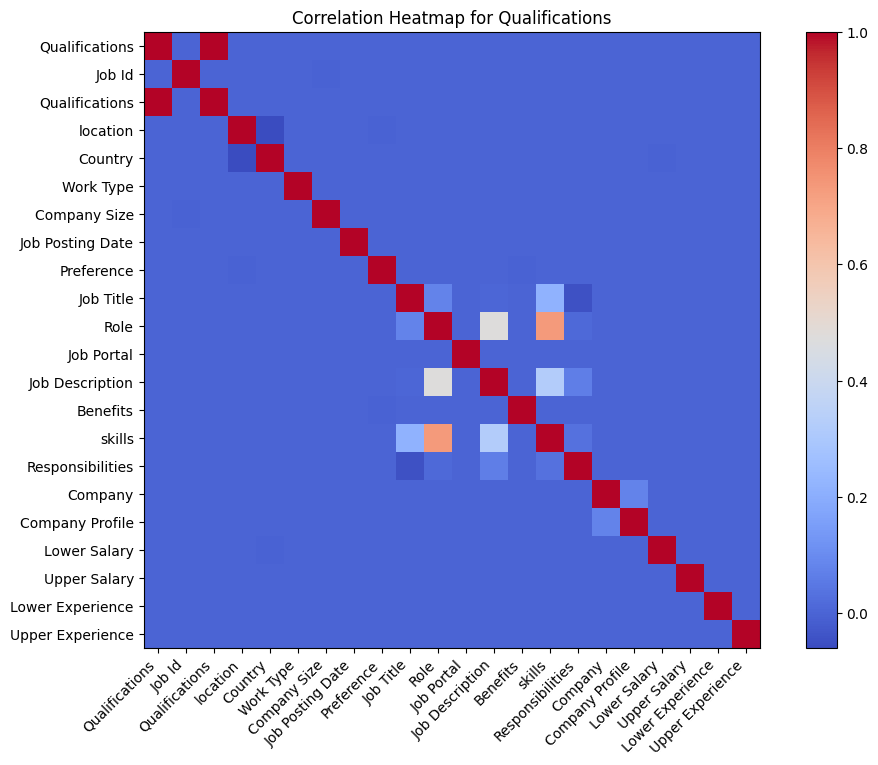

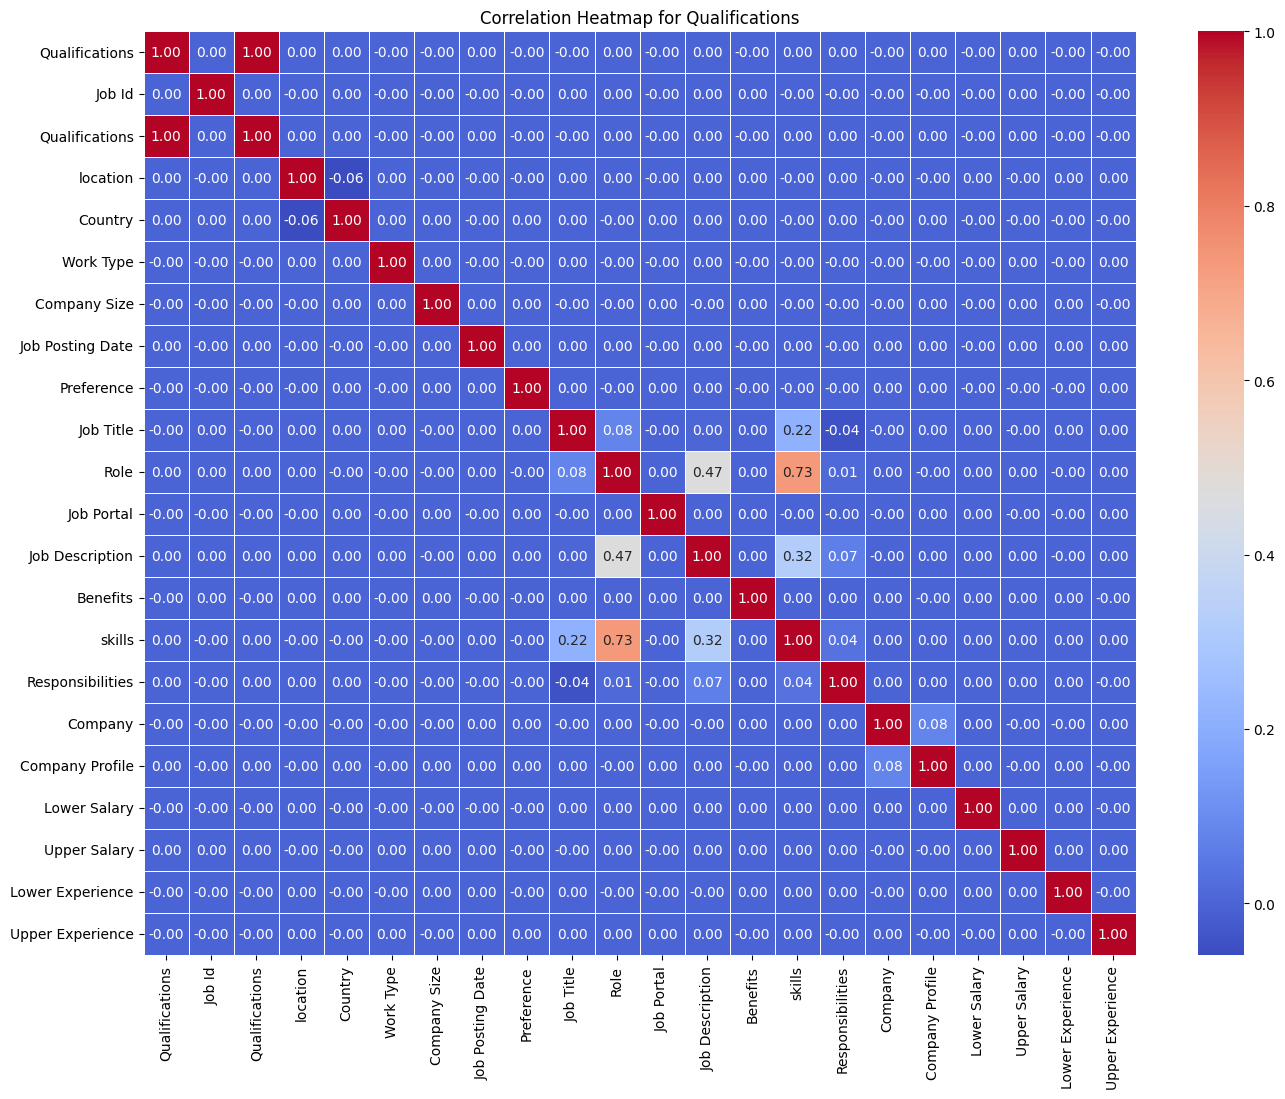

In [272]:
# Correlation between 'Qualifications' and other numerical features.

# Select the numerical features you want to analyze the correlation with 'Qualifications'
numerical_features = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for 'Qualifications' and other numerical features
correlation_matrix = df[['Qualifications'] + list(numerical_features)].corr()

# Create a heatmap using matplotlib.pyplot
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap for Qualifications')
plt.show()



# using sns
# Adjusting the heatmap for better readability
plt.figure(figsize=(16, 12))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})  # Adjust font size for annotations
plt.title('Correlation Heatmap for Qualifications')
plt.show()


In [174]:
from sklearn.utils import shuffle
df = shuffle(df)
# df

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Iterate through each column in the DataFrame
# for column in df.select_dtypes(include=['object']).columns:  # Only select object type columns
#     df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded values
print(df.head())

                   Job Id  Qualifications  location  Country  Work Type  \
459790     62798402878802               3       120       42          1   
1313630  2794710760659772               5       114      125          4   
274975   1158041689729624               1       185      100          3   
29928     423060543085997               9       130       48          4   
1222211  1320302092792672               6       176      170          3   

         Company Size  Job Posting Date  Preference  Job Title  Role  ...  \
459790          28026               582           0         94   298  ...   
1313630        132307               169           0         34    98  ...   
274975          58169               148           1          2    50  ...   
29928           81112               695           1          4   131  ...   
1222211         24053               548           1         42   236  ...   

         Job Description  Benefits  skills  Responsibilities  Company  \
459790       

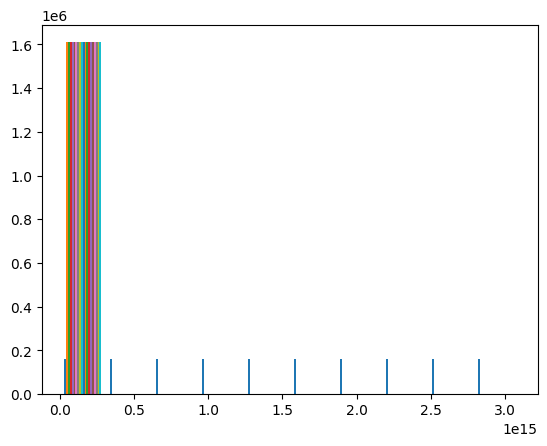

In [273]:
import matplotlib.pyplot as plt
# x = df.drop('Lower Salary', axis = 1)
x = df.drop('Lower Salary', axis = 1)
y = df['Lower Salary']
plt.hist(x)
plt.show()

The histogram indicates a highly skewed distribution with a concentration of values near zero and a few extreme outliers. Understanding the nature of these outliers and their impact on your analysis is crucial for accurate interpretation and modeling.

In [274]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaled_x = std_scaler.fit_transform(x)
std_scaled_x

array([[-0.51318644,  0.523008  , -0.76373562, ..., -0.40620812,
         1.4627091 ,  1.52797038],
       [-1.28597049, -0.17357704, -1.53794137, ...,  0.7488955 ,
        -0.29392404,  0.21903666],
       [-1.19299135,  1.56788557, -0.0701763 , ..., -0.06647176,
        -1.4650128 ,  0.21903666],
       ...,
       [-1.04340461, -0.17357704, -1.53794137, ..., -0.61004993,
         0.87716472,  1.52797038],
       [-0.83252772, -0.17357704,  0.5266073 , ..., -0.13441903,
         1.4627091 ,  1.52797038],
       [-1.27904991, -0.52186956, -1.52181208, ...,  0.2732646 ,
        -0.87946842, -0.21727458]])

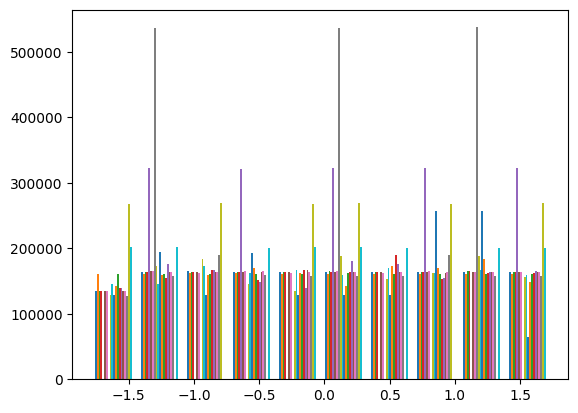

In [275]:
plt.hist(std_scaled_x)
plt.show()

MinMaxScaler transforms the data points between 0 and 1

In [276]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaled_x = minmax_scaler.fit_transform(x)
minmax_scaled_x

array([[0.3515677 , 0.66666667, 0.27699531, ..., 0.38      , 1.        ,
        1.        ],
       [0.1284983 , 0.44444444, 0.05164319, ..., 0.72      , 0.4       ,
        0.57142857],
       [0.15533736, 1.        , 0.47887324, ..., 0.48      , 0.        ,
        0.57142857],
       ...,
       [0.1985166 , 0.44444444, 0.05164319, ..., 0.32      , 0.8       ,
        1.        ],
       [0.25938765, 0.44444444, 0.65258216, ..., 0.46      , 1.        ,
        1.        ],
       [0.13049597, 0.33333333, 0.05633803, ..., 0.58      , 0.2       ,
        0.42857143]])

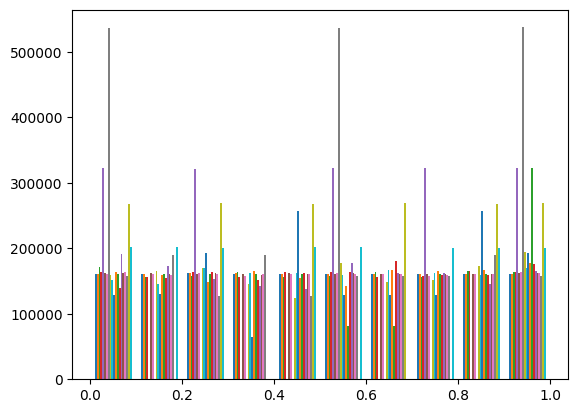

In [277]:
plt.hist(minmax_scaled_x)
plt.show()

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define your target variable
target_column = 'Lower Salary'

# Split the data into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (1288369, 20), (1288369,)
Testing set shape: (322093, 20), (322093,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared for evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")